# Repeated experiments with Monte Carlo estimation

In [1]:
import matplotlib.pyplot as plt
from utils import *

torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

In [2]:
num_experiments = 1000


# Parameters
prob_delta = 0.5
num_segments = 6
max_iter = 2000
num_samples = 2048
dims_dense =[1, 16, 64, 16, 1]

list_of_dfs = []

#Distribution

K_intervals = torch.Tensor([[0.5, 1],
                        [3,3]])
nu = NormUnif(x_dim = 2, prob_delta=prob_delta, K_intervals=K_intervals)

middle_point = [0,0]
range_p = [5, 5]

grid_size = 200
xx, yy = torch.meshgrid(torch.linspace((middle_point[0]-range_p[0]), (middle_point[0]+range_p[0]), grid_size), torch.linspace((middle_point[1]-range_p[1]), (middle_point[1]+range_p[1]), grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
import pandas as pd



    
for run_id in tqdm(range(num_experiments)):
    # Creating model
    base = nf.distributions.base.DiagGaussian(2)
    flows = []
    for i in range(num_segments):
        flows += [AffineSingleBlock(SimpleDenseCustDim(dims_dense))]
        flows += [Swap()]

    flows += [ScalingBlock(dim_x = 2)]
    model = MyNormFlow(q0 = base, flows = flows)

    show_iter = int(max_iter/8)

    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

    # Get training samples
    x_np = nu.forward(num_samples)[0].numpy()
    x = torch.tensor(x_np).float()

    # Training loop
    for it in range(max_iter):
        optimizer.zero_grad()
        
        # Compute loss
        loss = model.forward_kld(x)
        
        # Do backprop and optimizer step
        if ~(torch.isnan(loss) | torch.isinf(loss)):
            loss.backward()
            optimizer.step()
        
    

    
    t_array = np.arange(0, 3.01, 0.1)
    true_probs = []
    probs_x_np = []
    cmc_2048 = []
    cmc_4096 = []
    cmc_10000 = []

    # Calculating true value of P(X>t)
    for t_float in t_array:
        t = torch.tensor(t_float)
        true_probs.append(nu.prob_greater_t(t).item())
        probs_x_np.append(calc_prob_greater_t(samples_np=x_np, t_float=t_float))

    dict_estims = {'t':t_array, 'true_probs':true_probs, 'probs_x_np':probs_x_np}

    for nums_s in [2048, 4096, 10000]:
        cmc_list = []
        strat_list = []
        for t_float in t_array:
            cmc_list.append(estim_prob_greater_t(model, R = nums_s, t_float=t_float))
            samples_strat = generate_samples_from_model_stratified(model, 20000, m=4, n = 2,verbose=False)['samples']
            strat_list.append(calc_prob_greater_t(samples_np=samples_strat, t_float=t_float))
        
        dict_estims[f'cmc_{nums_s}'] = cmc_list.copy()
        dict_estims[f'strat_{nums_s}'] = strat_list.copy()

    estim_df = pd.DataFrame(dict_estims)
    estim_df['run_id'] = run_id
    list_of_dfs.append(estim_df)
    if (run_id + 1)%50 == 0:
        main_df = pd.concat(list_of_dfs)
        main_df.to_csv('MC_NICE_experiments.csv')
        print(f"Saved df with {run_id+1} experiments!")

c:\Users\Sacia\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
  5%|▌         | 50/1000 [47:08<14:35:40, 55.31s/it]

Saved df with 50 experiments!


 10%|█         | 100/1000 [1:34:43<14:15:58, 57.06s/it]

Saved df with 100 experiments!


 15%|█▌        | 150/1000 [2:19:26<12:42:02, 53.79s/it]

Saved df with 150 experiments!


 20%|██        | 200/1000 [3:53:50<12:35:41, 56.68s/it]  

Saved df with 200 experiments!


 25%|██▌       | 250/1000 [6:33:46<11:45:09, 56.41s/it]   

Saved df with 250 experiments!


 30%|███       | 300/1000 [7:36:25<11:17:30, 58.07s/it] 

Saved df with 300 experiments!


 35%|███▌      | 350/1000 [8:25:01<10:25:44, 57.76s/it]

Saved df with 350 experiments!


 40%|████      | 400/1000 [9:12:51<9:52:54, 59.29s/it] 

Saved df with 400 experiments!


 45%|████▌     | 450/1000 [10:00:10<8:20:51, 54.64s/it]

Saved df with 450 experiments!


 50%|█████     | 500/1000 [12:46:35<7:29:42, 53.97s/it]    

Saved df with 500 experiments!


 55%|█████▌    | 550/1000 [14:11:20<7:51:55, 62.92s/it]  

Saved df with 550 experiments!


 60%|██████    | 600/1000 [15:06:43<9:25:10, 84.78s/it] 

Saved df with 600 experiments!


 65%|██████▌   | 650/1000 [15:54:41<4:57:43, 51.04s/it]

Saved df with 650 experiments!


 70%|███████   | 700/1000 [16:42:00<4:38:16, 55.66s/it]

Saved df with 700 experiments!


 75%|███████▌  | 750/1000 [24:19:40<3:52:12, 55.73s/it]    

Saved df with 750 experiments!


 80%|████████  | 800/1000 [25:05:25<3:03:52, 55.16s/it]

Saved df with 800 experiments!


 85%|████████▌ | 850/1000 [27:38:40<3:04:57, 73.98s/it]   

Saved df with 850 experiments!


 90%|█████████ | 900/1000 [29:16:23<1:47:39, 64.59s/it]  

Saved df with 900 experiments!


 95%|█████████▌| 950/1000 [30:01:57<44:29, 53.38s/it]  

Saved df with 950 experiments!


100%|██████████| 1000/1000 [32:07:11<00:00, 115.63s/it]  

Saved df with 1000 experiments!


In [10]:
main_df = pd.concat(list_of_dfs)
main_df.shape

(31000, 10)

In [4]:
main_df.to_csv('MC_NICE_experiments.csv')

In [11]:
main_df.tail()

,t,true_probs,probs_x_np,cmc_2048,strat_2048,cmc_4096,strat_4096,cmc_10000,strat_10000,run_id
26,2.6,1.601087e-02,0.014160,0.014648,0.01140,0.011475,0.01365,0.0104,0.01035,999
27,2.7,9.006008e-03,0.009277,0.007812,0.00655,0.007568,0.00740,0.0060,0.00685,999
28,2.8,4.003266e-03,0.003906,0.002930,0.00350,0.003906,0.00355,0.0033,0.00345,999
29,2.9,1.001739e-03,0.001465,0.000977,0.00135,0.000732,0.00140,0.0015,0.00085,999
30,3.0,9.111501e-07,0.000000,0.000488,0.00050,0.000488,0.00050,0.0005,0.00025,999


In [6]:
means_df = main_df.groupby('t').apply('mean')

In [7]:
means_diff_df = means_df.drop(['run_id', 'true_probs'], axis=1).sub(means_df['true_probs'], axis=0)
means_diff_df

,probs_x_np,cmc_2048,strat_2048,cmc_4096,strat_4096,cmc_10000,strat_10000
t,,,,,,,
0.0,-4.165039e-04,0.000250,0.003335,0.000079,0.003473,0.000143,0.003103
0.1,-4.519415e-04,0.000522,0.003102,0.000105,0.002987,-0.000055,0.003122
0.2,-5.073223e-04,-0.000291,0.002821,-0.000516,0.002865,-0.000283,0.002820
0.3,-5.344157e-04,-0.001027,0.001925,-0.000989,0.001860,-0.000983,0.001842
0.4,-5.496778e-04,-0.003396,0.000136,-0.003114,0.000078,-0.003226,-0.000029
0.5,-4.316907e-04,-0.006483,-0.004357,-0.007583,-0.004583,-0.007393,-0.004400
0.6,-3.969417e-04,0.001367,0.004564,0.001629,0.004480,0.001368,0.004339
0.7,-4.514132e-04,0.006698,0.009908,0.007202,0.009976,0.007110,0.009706
0.8,-3.954566e-04,0.010358,0.013186,0.010405,0.013136,0.010291,0.013152


In [8]:
main_df.t.unique()
ts_to_show = [0.3, 0.8, 1.3, 1.8]
main_df_hist = main_df[main_df['t'].round(1).isin(ts_to_show)]

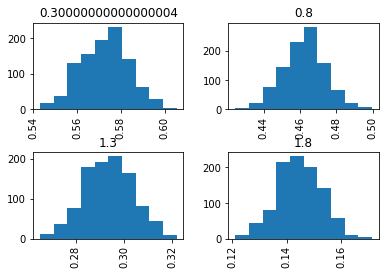

In [9]:
main_df_hist['probs_x_np'].hist(by=main_df_hist['t'])
plt.show()

<AxesSubplot:xlabel='t'>

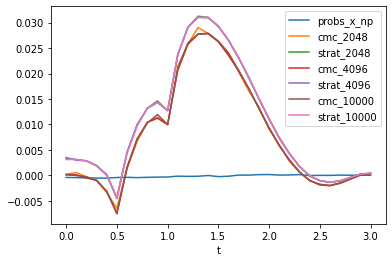

In [14]:
means_diff_df.plot()

<AxesSubplot:xlabel='t'>

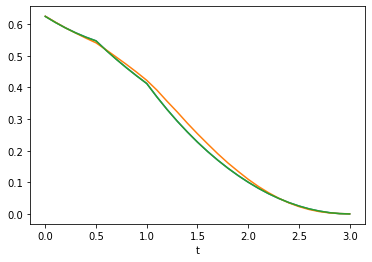

In [19]:
means_df['true_probs'].plot()
means_df['cmc_2048'].plot()
means_df['probs_x_np'].plot()

## Repeated experimetns RealNVP

In [ ]:
num_experiments = 1000


# Parameters
prob_delta = 0.5
num_segments = 6
max_iter = 1750
num_samples = 2048
dims_dense =[1, 16, 64, 16, 1]

list_of_dfs = []

#Distribution

K_intervals = torch.Tensor([[0.5, 1],
                        [3,3]])
nu = NormUnif(x_dim = 2, prob_delta=prob_delta, K_intervals=K_intervals)

middle_point = [0,0]
range_p = [5, 5]

grid_size = 200
xx, yy = torch.meshgrid(torch.linspace((middle_point[0]-range_p[0]), (middle_point[0]+range_p[0]), grid_size), torch.linspace((middle_point[1]-range_p[1]), (middle_point[1]+range_p[1]), grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
import pandas as pd



    
for run_id in tqdm(range(num_experiments)):
    base = nf.distributions.base.DiagGaussian(2)

    # Define list of flows
    num_layers = 32
    flows = []
    for i in range(num_layers):
        # Neural network with two hidden layers having 64 units each
        # Last layer is initialized by zeros making training more stable
        param_map = nf.nets.MLP([1, 64, 64, 2], init_zeros=True)
        # Add flow layer
        flows.append(nf.flows.AffineCouplingBlock(param_map))
        # Swap dimensions
        flows.append(nf.flows.Permute(2, mode='swap'))

    model = nf.NormalizingFlow(base, flows)

    show_iter = int(max_iter/8)

    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

    # Get training samples
    x_np = nu.forward(num_samples)[0].numpy()
    x = torch.tensor(x_np).float()

    # Training loop
    for it in range(max_iter):
        optimizer.zero_grad()
        
        # Compute loss
        loss = model.forward_kld(x)
        
        # Do backprop and optimizer step
        if ~(torch.isnan(loss) | torch.isinf(loss)):
            loss.backward()
            optimizer.step()
        
    

    
    t_array = np.arange(0, 3.01, 0.1)
    true_probs = []
    probs_x_np = []
    cmc_2048 = []
    cmc_4096 = []
    cmc_10000 = []

    # Calculating true value of P(X>t)
    for t_float in t_array:
        t = torch.tensor(t_float)
        true_probs.append(nu.prob_greater_t(t).item())
        probs_x_np.append(calc_prob_greater_t(samples_np=x_np, t_float=t_float))

    dict_estims = {'t':t_array, 'true_probs':true_probs, 'probs_x_np':probs_x_np}

    for nums_s in [2048, 4096, 10000]:
        cmc_list = []
        strat_list = []
        for t_float in t_array:
            cmc_list.append(estim_prob_greater_t(model, R = nums_s, t_float=t_float))
            samples_strat = generate_samples_from_model_stratified(model, 20000, m=4, n = 2,verbose=False)['samples']
            strat_list.append(calc_prob_greater_t(samples_np=samples_strat, t_float=t_float))
        
        dict_estims[f'cmc_{nums_s}'] = cmc_list.copy()
        dict_estims[f'strat_{nums_s}'] = strat_list.copy()

    estim_df = pd.DataFrame(dict_estims)
    estim_df['run_id'] = run_id
    list_of_dfs.append(estim_df)
    if (run_id + 1)%50 == 0:
        main_df = pd.concat(list_of_dfs)
        main_df.to_csv('MC_RealNVP_experiments.csv')
        print(f"Saved df with {run_id+1} experiments!")